In [351]:
import pandas as pd
import numpy as np
rnd = 384
np.random.seed(rnd)

In [352]:
df = pd.read_csv('./data/datasets/adult_clear.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/datasets/adult_clear.csv')
df = df[df["workclass"] != "?"]
df = df[df["occupation"] != "?"]
df = df[df["native-country"] != "?"]
df.replace(['Divorced', 'Married-AF-spouse',
            'Married-civ-spouse', 'Married-spouse-absent',
            'Never-married', 'Separated', 'Widowed'],
           ['notmarried', 'married', 'married', 'married',
            'notmarried', 'notmarried', 'notmarried'], inplace=True)
df['education'].replace(['Preschool', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th'], 'dropout',
                        inplace=True)
df['education'].replace(['HS-Grad', 'HS-grad'], 'HighGrad', inplace=True)
df['education'].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'CommunityCollege', inplace=True)
df = df[df.race == 'White']
# excludes 10 observations
df = df[df['workclass'] != 'Never-worked']
# excludes 14 observations
df = df[df['occupation'] != 'Armed-Forces']
# excludes 21 observations
df = df[df['workclass'] != 'Without-pay']
df.drop(['fnlwgt', 'educational-num', 'relationship', 'race', 'capital-gain', 'capital-loss'],
            axis=1, inplace=True)
df['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Gov', inplace=True)
df['workclass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], 'Private', inplace=True)
df['occupation'].replace(
    ['Craft-repair', 'Machine-op-inspct', 'Handlers-cleaners', 'Transport-moving', 'Adm-clerical',
     'Farming-fishing'], 'BlueCollar', inplace=True)
df['occupation'].replace(['Other-service', 'Protective-serv', 'Tech-support', 'Priv-house-serv'], 'Services',
                         inplace=True)
df['occupation'].replace(['Exec-managerial'], 'ExecManagerial', inplace=True)
df['occupation'].replace(['Prof-specialty'], 'ProfSpecialty', inplace=True)
df['education'].replace(['Prof-school'], 'ProfSchool', inplace=True)
df['native-country'].replace(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', \
                              'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',\
                              'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland',\
                              'Italy', 'Jamaica', 'Japan', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)',\
                              'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South',\
                              'Taiwan','Thailand', 'Trinadad&Tobago', 'Vietnam','Yugoslavia'], 'Non_US', inplace=True)
df.rename(columns={'hours-per-week': 'hoursPerWeek'}, inplace=True)
df.rename(columns={'marital-status': 'marital_status'}, inplace=True)
df.rename(columns={'native-country': 'native_country'}, inplace=True)
columns_titles = ["age","hoursPerWeek","education","marital_status","occupation","gender","native_country","income"]
df=df.reindex(columns=columns_titles)
print(df)
X = df.copy()
enc = OrdinalEncoder()
std = MinMaxScaler(feature_range=(-1,1))
X.iloc[:,2:] = enc.fit_transform(X.values[:,2:]).astype(int)
X.iloc[:,:2] = std.fit_transform(X.values[:,:2])
X.drop(['income'], axis=1, inplace=True)
y = df["income"].apply(lambda x: ">50K" in x).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=rnd)

In [354]:
X_train

,age,hoursPerWeek,education,marital_status,occupation,gender,native_country
3646,0.506849,-0.510204,3,1,4,0,1
22522,-0.561644,-0.204082,1,0,2,0,1
40214,0.479452,-0.204082,1,1,0,0,1
30368,-0.616438,-0.204082,1,1,0,1,1
28758,-0.808219,0.000000,1,0,0,1,1
...,...,...,...,...,...,...,...
23011,-0.397260,-0.204082,3,1,0,1,1
6421,-0.616438,0.000000,5,1,2,1,1
18605,0.260274,0.000000,4,0,1,1,1
28637,-0.534247,0.244898,0,1,3,1,1


In [358]:
import torch
import torch.nn as nn

dataset_name = 'adult_clear'

class LinearModel(nn.Module):
    def __init__(self, input_shape, latent_dim=2):
        super(LinearModel, self).__init__()

        # encoding components
        self.fc1 = nn.Linear(input_shape, latent_dim)

    def encode(self, x):
        x = self.fc1(x)
        return x

    def forward(self, x):
        z = self.encode(x)
        return z
    
latent_dim = 5
model = LinearModel(X_train.shape[1],latent_dim)

In [359]:
model.load_state_dict(torch.load(f'./models/{dataset_name}_LinearTransparent_latent_{latent_dim}.pt'))

<All keys matched successfully>

In [360]:
with torch.no_grad():
    Z_train = model(torch.tensor(X_train.values,dtype=torch.float32)).numpy()
    Z_test = model(torch.tensor(X_test.values,dtype=torch.float32)).numpy()

In [361]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(Z_train, y_train.values)
KNN_pred = neigh.predict(Z_train)

In [362]:
neigh.score(Z_test,y_test)

0.8117041800643087

In [311]:
from scipy.spatial import distance
import seaborn as sb
sb.set_style('whitegrid', rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15,
                              "axes.titlepad":22, "axes.labelpad":18, "legend.fontsize":15, "legend.title_fontsize":15,
                              "font.family":'sans-serif'})
idx = 35

q = X_test.values[idx].reshape(1,-1).copy()
with torch.no_grad():
    z = model(torch.tensor(q,dtype=torch.float32)).numpy()

In [312]:
pred = int(predict(q))
print(pred)
print(y_test.values[idx])

0
0


In [313]:
def find_changes(start_point, end_point=None, z_end=None, max_iter=5, debug=False):
    
    if z_end is None:
        z_end   = model(torch.tensor(end_point,dtype=torch.float32)).detach().numpy()
    z_start = model(torch.tensor(start_point,dtype=torch.float32)).detach().numpy()
    
    w = model.fc1.weight.detach().numpy()
    b = model.fc1.bias.detach().numpy()
    
    mods = np.zeros(len(start_point[0,:]))
    
    x_mod = start_point.copy()+mods
    z_mod = model(torch.tensor(x_mod).float()).detach().reshape(1,-1).numpy()

    pred = int(neigh.predict(z_start))
    pred_mod = int(neigh.predict(z_mod))
    j = 1
    dist = distance.euclidean(z_end,z_mod)
    
    while pred == pred_mod:
        if debug:
            print(distance.euclidean(z_end,z_mod))
        proj = z_end - z_mod
        d = np.argsort(np.abs(proj.dot(w)))
        d_mods = []
        for i in range(-7,0):
            x_mod_prop = x_mod.copy()
            idx = d[0, i]
            mod = np.sum((z_end-(np.sum(x_mod[0,:idx]*w[:,:idx],axis=1)+np.sum(x_mod[0,idx+1:]*w[:,idx+1:],axis=1))-b)*w[:,idx])/(np.sum(w[:,idx]**2))
            if idx >= 2:
                mod = np.round(np.clip(mod,0,1))
            else:
                mod = np.clip(mod,-1,1)
            x_mod_prop[0, idx] = mod
            z_mod_prop = model(torch.tensor(x_mod_prop).float()).detach().reshape(1,-1).numpy()
            d_mods.append(distance.euclidean(z_end,z_mod_prop))
        idx = d[0,range(-7,0)[np.argmin(d_mods)]]
        mod = np.sum((z_end-(np.sum(x_mod[0,:idx]*w[:,:idx],axis=1)+np.sum(x_mod[0,idx+1:]*w[:,idx+1:],axis=1))-b)*w[:,idx])/(np.sum(w[:,idx]**2))
        if idx >= 2:
            mod = np.round(np.clip(mod,0,1))
        else:
            mod = np.clip(mod,-1,1)
        mods[idx] += mod - x_mod[0,idx]
        x_mod[0, idx] = mod
        z_mod = model(torch.tensor(x_mod).float()).detach().reshape(1,-1).numpy()
        
        if distance.euclidean(z_end,z_mod) == dist:
            j +=1
        else:
            j = 1
            dist = distance.euclidean(z_end,z_mod)
        
        if j == max_iter:
            break
        
        pred_mod = int(neigh.predict(z_mod))
        if debug:
            print(pred,pred_mod)
            print(j)
        
    return mods

In [314]:
centroid_0 = np.mean(Z_train[y_train==0],axis=0)
centroid_1 = np.mean(Z_train[y_train==1],axis=0)

mods = find_changes(q, z_end=centroid_1, debug=True)
transparent_cf = q+mods

2.1298885345458984
0 0
1
1.6270885467529297
0 0
1
1.3034323453903198
0 0
1
1.1564834117889404
0 0
1
1.0121135711669922
0 1
1


# Gradient descend Input space

In [319]:
def predict(q):
    return neigh.predict(model(torch.tensor(q).float()).detach())

In [320]:
q = X_test.values[idx].reshape(1,-1).copy()
pred = int(predict(q))
print(pred)
print(y_test.values[idx])

0
0


In [321]:
mods = X_test.values[idx].reshape(1,-1).copy()
mods = torch.nn.parameter.Parameter(torch.tensor(mods, requires_grad=True).float())
loss = torch.nn.MSELoss()

In [322]:
loss(torch.tensor(centroid_1).reshape(1,-1),model(mods))

tensor(0.9073, grad_fn=<MseLossBackward0>)

In [323]:
opt = torch.optim.Adam([mods],lr=0.001)

In [324]:
from tqdm.notebook import tqdm
total_loss = []

while pred == 0:
    loss_epoch = loss(torch.tensor(centroid_1).reshape(1,-1),model(mods)) 
    total_loss.append(loss_epoch.item())
    loss_epoch.backward()
    opt.step()
    opt.zero_grad()
    mods_approx = mods.detach()
    pred = int(neigh.predict(model(mods_approx).detach().numpy()))

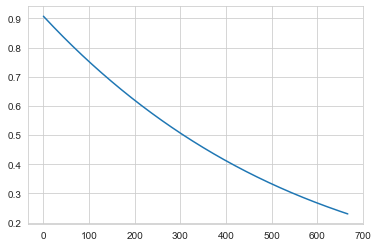

In [325]:
plt.plot(total_loss);

In [326]:
mods = mods.detach().numpy()
mods[0,2:] = np.round(mods[0,2:])

In [327]:
gradient_cf = mods

# Growing Spheres

In [331]:
from growingspheres import counterfactuals as cf

def predict(q):
    return neigh.predict(model(torch.tensor(q).float()).detach())

q = X_test.values[idx].reshape(1,-1).copy()
pred = int(predict(q))
pred

0

In [332]:
CF = cf.CounterfactualExplanation(q, predict, method='GS')
CF.fit(n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True, verbose=True)
GS_cf = CF.enemy.reshape(1,-1)
GS_cf[0,2:] = np.round(CF.enemy[2:])

0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  48
Final radius:  (0.8560000000000004, 0.8740000000000004)
Final number of ennemies:  1
Feature selection...
Reduced 3 coordinates


In [335]:
pd.DataFrame(np.vstack((q,transparent_cf,gradient_cf,CF.enemy)),columns=X_train.columns)

,age,hoursPerWeek,education,marital_status,occupation,gender,native_country
0,-0.945205,-0.612245,3.0,1.0,0.0,1.0,1.0
1,-0.308745,-1.000000,1.0,0.0,1.0,1.0,1.0
2,-0.432063,-0.062026,2.0,0.0,1.0,1.0,1.0
3,-0.518926,-0.612245,4.0,1.0,1.0,1.0,1.0
